In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


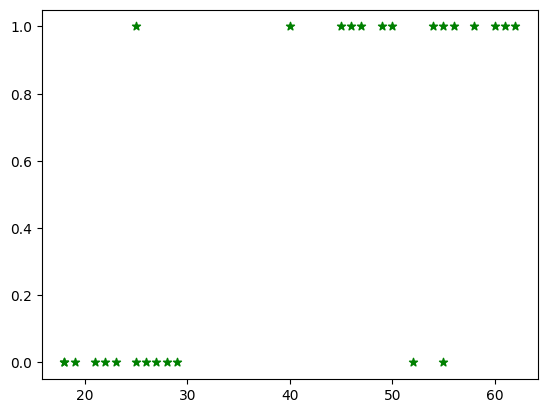

In [4]:
plt.scatter(df.age, df.bought_insurance, marker='*', color='green')

In [5]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8)

In [18]:
X_test

,age
11,28
26,23
15,55
16,25
14,49
20,21


In [19]:
X_test.shape

(6, 1)

In [20]:
y_test

,bought_insurance
11,0
26,0
15,1
16,1
14,1
20,0


In [21]:
y_test.shape

(6,)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
X_test

,age
11,28
26,23
15,55
16,25
14,49
20,21


In [41]:
y_predicted = model.predict(X_test)

In [43]:
model.predict([[55]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [26]:
model.predict_proba(X_test)

array([[0.88909108, 0.11090892],
       [0.94527145, 0.05472855],
       [0.11269243, 0.88730757],
       [0.92703748, 0.07296252],
       [0.24187744, 0.75812256],
       [0.95914939, 0.04085061]])

In [27]:
model.score(X_test, y_test)

0.8333333333333334

In [28]:
y_predicted

array([0, 0, 1, 0, 1, 0])

In [29]:
X_test

,age
11,28
26,23
15,55
16,25
14,49
20,21


model.coef_ indicates value of m in y=m*x + b equation

In [30]:
model.coef_

array([[0.15351925]])

model.intercept_ indicates value of b in y=m*x + b equation

In [31]:
model.intercept_

array([-6.38002935])

Lets defined sigmoid function now and do the math with hand

In [32]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [33]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [37]:
age = 35
prediction_function(age) #0.485 is less than 0.5 which means person with 35 age will not buy insurance

0.4850044983805899

In [39]:
age = 43
prediction_function(age) #0.568 is more than 0.5 which means person with 43 will buy the insurance

0.568565299077705